In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [8]:
os.getcwd()

'C:\\Users\\minec\\JuProjects\\Bai5'

In [9]:
data = pd.read_excel('data.xlsx')
display(data)

,Unnamed: 0,Np,Unnamed: 2,Unnamed: 3,N
0,NaN,133,NaN,NaN,22306
1,NaN,108,NaN,NaN,22171
2,NaN,84,NaN,NaN,22095
3,NaN,124,NaN,NaN,22218
4,NaN,129,NaN,NaN,22164
5,NaN,125,NaN,NaN,22205
6,NaN,123,NaN,NaN,22110
7,NaN,90,NaN,NaN,22232
8,NaN,103,NaN,NaN,22202
9,NaN,94,NaN,NaN,22280


In [10]:
Np = np.array(data['Np'][0:])
N = np.array(data['N'][0:])
print(Np)
print(N)

[133 108  84 124 129 125 123  90 103  94]
[22306 22171 22095 22218 22164 22205 22110 22232 22202 22280]


In [11]:
Nreal = N - Np

Data_clean = {
    'Số đếm phông': Np,
    'Số đếm tổng': N,
    'Số đếm thật': Nreal,
}

df = pd.DataFrame(Data_clean)
display(df)

,Số đếm phông,Số đếm tổng,Số đếm thật
0,133,22306,22173
1,108,22171,22063
2,84,22095,22011
3,124,22218,22094
4,129,22164,22035
5,125,22205,22080
6,123,22110,21987
7,90,22232,22142
8,103,22202,22099
9,94,22280,22186


In [86]:
STT = np.linspace(1, len(N), len(N))
print(STT)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Sai số thống kê:
Sai số đếm phông + Sai số đếm tổng

In [119]:
n = len(N)

# Sai số đếm phông:
S2_Np = sum((Np-np.mean(Np))**2) / (n-1)
S_Np = np.sqrt(S2_Np)
erNp = S_Np / (np.sqrt(n))

# Sai số đếm tổng:
S2_N = sum((N-np.mean(N))**2) / (n-1)
S_N = np.sqrt(S2_N)
erN = S_N / (np.sqrt(n))

# Sai số thống kê (số đếm thật):
erS = erNp + erN
print(erS) # số đếm/100s

26.772042920267396


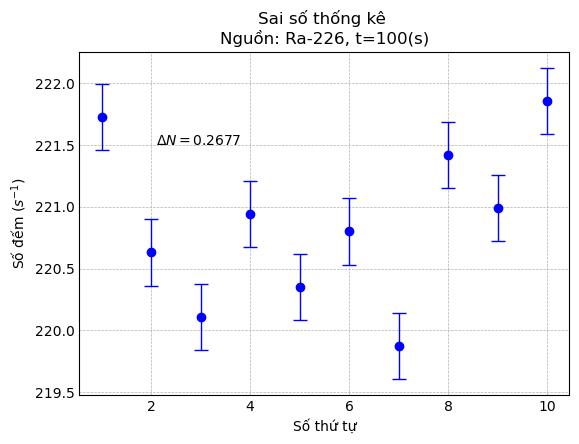

In [144]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(5, 3.5))


p1 = plt.errorbar(STT, Nreal/100, yerr=erS/100,
                  linestyle='None', fmt='o', 
                  linewidth=1, 
                  capsize=5, 
                  color='blue')

plt.title("Sai số thống kê \nNguồn: Ra-226, t=100(s)")
plt.ylabel('Số đếm $(s^{-1})$')
plt.xlabel('Số thứ tự')
plt.grid(linestyle='--', linewidth=0.5)

plt.text(2.1,221.5, '$\Delta N = $' + str(round(erS/100,4)) )

plt.savefig('plot.png', dpi=300, bbox_inches='tight')


In [132]:
Data_clean = {
    'Số đếm phông $Np$': Np,
    'Số đếm tổng $N$': N,
    'Số đếm thật $Nr$': Nreal,
}
df = pd.DataFrame(Data_clean)
display(df)
    
Data_ernum = {
    '$\Delta Np (s^{-1})$': round(erNp/100,4),
    '$\Delta Nr (s^{-1})$': round(erN/100,4),
    '$\Delta N (s^{-1})$': round(erS/100,4), 
}
df_2 = pd.Series(Data_ernum).to_frame('Giá trị sai số')
display(df_2)

,Số đếm phông $Np$,Số đếm tổng $N$,Số đếm thật $Nr$
0,133,22306,22173
1,108,22171,22063
2,84,22095,22011
3,124,22218,22094
4,129,22164,22035
5,125,22205,22080
6,123,22110,21987
7,90,22232,22142
8,103,22202,22099
9,94,22280,22186


,Giá trị sai số
$\Delta Np (s^{-1})$,0.0563
$\Delta Nr (s^{-1})$,0.2115
$\Delta N (s^{-1})$,0.2677


In [140]:
df.to_excel(r'C:\Users\minec\JuProjects\Bai5\export_dataframe.xlsx', index=False)